# Introducción al manejo de datos geográficos

## Parte 1: preparándonos para trabajar con geopandas

Si hemos llegado juntos a esta sesión, es que seguramente ya contás con los rudimentos básicos para manejar datos con python. Ya manipulaste algunos de sus objetos nativos como listas, diccionarios y tuplas, e incluso trabajaste con arrays de numpy y dataframes de pandas. Bueno, entonces ya contamos con una gran ventaja. 

Si bien es cierto que la espacialidad es un atributo que requiere del conocimiento de algunos métodos específicos (que iremos viendo a lo largo del notebook), también lo es que los `datos espaciales` no dejan de ser `datos`. En otras palabras, esto significa que para familiarizarnos con ellos apelaremos a muchas de las estretegias que seguramente ya forman parte de tu repertortio. 

Hagamos un breve repaso de ellas...

### Algunas cuestiones básicas: funciones y métodos. 

Hasta acá, sabemos que una función es un bloque de código que comienza con la sentencia `def` y lleva un nombre asociado. Puede recibir argumentos, los que comúnmente son utilizados en una expresión o secuencia de sentencias para realizar alguna tarea o devolver un objeto. De esta manera...

In [1]:
# Armemos una función que devuelva la suma de los elementos de iterable...
def sumar(arg):
    '''
    Suma de los items de un objeto iterable.
    ...
    Argumentos:
        arg(iterable): iterable de elementos numéricos 
                       (e.g. 'list' o 'pandas serie')
    Devuelve:
        integer: resultado de la sumatoria
    '''
    total = 0
    for i in range(len(arg)):
        total = total + arg[i] 
    return total

In [2]:
iterable = [2,4,6,8]

In [3]:
sumar(iterable)

20

Vemos que esta función nos sirve para obtener el resultado. Llamándola y pasándole el parámetro que deseemos nos devuelve la sumatoria de todos sus elementos. Ahora, ¿la forma de ejecutar una función solamente es llamándola de este modo? No, hay otra manera de llamar a las funciones y esta es a través de los métodos. Un `método` es en sí mismo una función pero cuya cualidad principal es la de aplicarse sobre un objeto mismo, utilizando parámetros opcionales. Un método sólo existe dentro del objeto y por eso se lo puede llamar desde sí mismo.

En la POO, las clases tienen `atributos` y `métodos`. Por decirlo de alguna manera, la clase calculadora, tiene números y los puede sumar. En python, los métodos se definen dentro de las clases y se llaman desde el objeto aplicando un paréntesis. Esta es la otra manera de llamar funciones que nos estaba faltando. Veámosla...

In [4]:
# llamemos la función que creamos enteriormente...
sumar(iterable)

20

In [5]:
# hagamos lo mismo, sumar todos los elementos de un iterable pero ahora usando numpy...
import numpy as np

In [6]:
# hasta ahora tenemos el mismo resultado
np.sum(iterable)

20

Tratemos ahora de sumar los elementos de nuestra lista pero pensando a la suma como una propiedad que esta tiene y puede aplicar sobre sí misma. Es decir como si puedese hacerlo por el hecho de ser una lista:

In [7]:
# veamos qué sucede
iterable.sum()

AttributeError: 'list' object has no attribute 'sum'

Queda claro por el error. La lista no cuenta con un método integrado que permita automáticamente sumar los elementos que la componen. Pero no ocurre lo mismo con los objetos de numpy. Continuemos con el ejemplo y veamos por qué...

In [8]:
# convertimos nuesta lista en un array de numpy
np.array(iterable).sum()

20

Vemos que llamando a la función suma como un método del objeto ya no nos devuelve un error. Y esto es porque los arrays de numpy sí cuentan con un método o función integrada que les permite sumar los elementos que los componen (como así también restarlos, conseguir un promedio, y otras cosas con las que python nativo no cuenta. A menos que escribamos una función que lo haga como hicimos al principio de este ejemplo!).

Ahora que ya revisamos esto, tenemos en claro que los métodos se llaman o ejecutan desde el objeto mismo mientras que las funciones lo hacen por fuera y aplicando parámetros a una expresión. 

Revisemos ahora algunas formas alternativas de aplicar funciones y de llamar métodos que nos serán realmente útiles.

### Compañeros de ruta: la función lambda y los métodos map(), apply() y applymap() 

A esta altura, esperamos que algunas de las herramientas que has venido utilizando casi `de memoria` empiecen a decantar por si solas. Con seguridad necesitaste agregar o transformar columnas a tus dataframes para que cumplieran con determinadas características. Y para ello, debes haber utilizado métodos y funciones que nunca terminaste de entender bien qué es lo que hacían. Bueno, acá vamos a hacer una revisión rápida para terminar de entender cómo se usan y cuál es su equivalencia con estructuras de datos nativas de python. 

Hicimos esta selección porque creemos que son las de uso más frecuente y te servirán para terminar de redondear y afianzar muchas de las cosas que ya venís haciendo. Pensá esto como una cáscara que, a medida que avancemos, iremos llenando con atributos y métodos propios del mundo `geo`.

In [9]:
# empecemos por importar pandas con su clásico alias
import pandas as pd

> **1. La función anónima `lambda`**

Es muy útil pensar esta función como si el **`lambda`** equivaliera al **`def`** en una función regular. Para ponerlo en otros términos, digamos que la manera en la que definimos una función anónima también nos permite crear parámetros que vamos a usar para aplicar una expresión a partir de la que transformaremos algún objeto. 

![SINTAXIS](imagenes/sintaxis_funciones_anonima_regular.jpg)

Esto, con dos diferencias esenciales. **La primera, que la función anónima no requiere de un `return` para devolvernos un resultado**. 

![SINTAXIS](imagenes/funcionamiento_anonima_regular.jpg)

Veamos algún ejemplo concreto. Para ello, supongamos que contamos con un código (algo bastante común para reconocer unidades administrativas o físicas en un territorio dado) y que queremos hacer alguna transformación sobre el mismo. Por ejemplo, completar su formato para contar con mayor información o hacer algún matcheo o unión con fuentes de información externas. Imaginemos que estamos trabajando con el código postal y que sólo contamos con una de las siguientes secciones...

Vamos un caso real, el del CPA. El mismo está compuesto por ocho caracteres:
1. Una letra identificatoria de la provincia.
2. Un número de 4 dígitos que identifica la localidad, ciudad o barrio.
3. Una combinación de tres letras que identifican la "cara" de la manzana.

![CPA](imagenes/estructura_codigos_postales.png)

¿Cómo podríamos completarlo con otras secciones utilizando una función anónima si sólo contaramos con la intermedia, por ejemplo? Veamos cómo...

In [10]:
# instanciamos nuestro código incompleto.
codigo_postal = '1024'

# definimos una función para formar códigos postales que estén en una misma jurisdicción y cara de manzana
completar_formato = lambda x: 'C'+ x +'FDA'

# la aplicamos
completar_formato(codigo_postal)

'C1024FDA'

Como pudimos ver, `x` es nuestro parámetro, aquel sobre el cual se aplicará la expresión delimitada a partir del `lambda`.

**La segunda diferencia, es que las funciones anónimas sólo trabajan con una expresión en su cuerpo** (mientras que las regulares pueden contener muchas). `x` (o como nosotros decidamos que se llame) es lo que se conoce como un `place holder`. Es decir, podemos aplicar la expresión definida en la función a filas de una serie de pandas, a items de una lista, etc. Ahora bien, la función lambda sólo toma una expresión a la vez. Es decir, que debemos aplicarla a tantos objetos o elementos como parámetros hayamos definido en nuestra función.

Pero no nos dejemos confundir. Veamos qué pasa si queremos completar una serie o una lista.

In [11]:
# definimos nuevamente nuestro código
codigo_postal = pd.Series(['C','1024','FDA'])

# rehacemos la función anónima, ahora agregando algunos parámetros más después de la key 'lambda'
completar_formato = lambda x,y,z: x + y + z

In [12]:
# prestemos atención al tipo de error que nos devuelve
completar_formato(codigo_postal)

TypeError: <lambda>() missing 2 required positional arguments: 'y' and 'z'

Como se puede leer, hay dos argumentos que aparecen como missing. Y esto es porque estamos aplicando una función con tres parametros sobre una sola serie. Distinto hubiese sido si...

In [13]:
# instanciamos por separado las distintas parte del código
parte_uno, parte_dos, parte_tres = 'C','1024','FDA'

# y aplicamos la función sobre las tres partes
completar_formato(parte_uno, parte_dos, parte_tres)

'C1024FDA'

O si...

In [14]:
# suponiendo que tenemos una serie con muchas secciones de codigos postales ordenadas
codigo_postal = pd.Series(['C','1024','FDA','C','1171','ABM','C','1097','AAX'])

In [15]:
# rearmamos nuestra función lambda con un solo parametro
completar_formato = lambda x: [x[i]+x[i+1]+x[i+2] for i in x.index if len(x[i])<2]

In [16]:
# para obtener todos los codigos postales con las secciones que estaban dispersas, ahora concatendas
completar_formato(codigo_postal)

['C1024FDA', 'C1171ABM', 'C1097AAX']

> **2. El método `map`**

Este método se utiliza para aplicar una función a todos los elementos de un iterable especificado. De esta manera, su sintáxis queda definida como:

![SINTAXIS](imagenes/sintaxis_map.jpg)

Se pueden pasar múltiples argumentos, siempre que la función que se esté mapeando tenga esa misma cantidad de argumentos. La función se va a aplicar a dichos iterables en paralelo y se va a detener cuando el iterable más corto haya sido agotado. Veamos algunos ejemplos...

In [17]:
# armamos una funcion regular que sume tres variables
def combina(a,b,c):
    return a+b+c

# aplicamos la función a las tres secciones de nuestro código postal
map(combina,parte_uno, parte_dos, parte_tres)

Detengámonos brevemente en qué nos devuelve, un obtejo `map`. Este es un [`iterador`](https://docs.python.org/3/glossary.html#term-iterator) y en python está diseñado así por una cuestión de eficiencia. Es decir, para evitar guardar en memoria todo sobre lo que se itera, map devuelve un objeto de tipo iterador que se puede visualizar cuando le aplicamos algún contenedor, como una lista o una serie. 

In [18]:
list(map(combina,[parte_uno], [parte_dos], [parte_tres]))

['C1024FDA']

In [19]:
pd.Series(map(combina,[parte_uno],[parte_dos], [parte_tres]))

0    C1024FDA
dtype: object

Y por qué se puede leer cuando le aplicamos un contenedor?, basicamente porque el objeto de tipo `map` es un objeto iterable, es decir, que se puede iterar sobre él:

In [20]:
for i in map(combina, [parte_uno], [parte_dos], [parte_tres]):
    print(i)

C1024FDA


Esto significa que, por ejemplo, si aplcaramos un `list()` a un `map(func, iter)` estaría sucediendo algo como esto:

In [21]:
codigo = []
for i in map(combina,[parte_uno], [parte_dos], [parte_tres]):
    codigo.append(i)
    
codigo

['C1024FDA']

Este comportamiento hace que `map()` sea más rápido que otras alternativas, por ejemplo una lista por comprensión.

In [22]:
import time

In [23]:
partes = ['C','1024','FDA','C','1171','ABM','C','1097','AAX']

In [24]:
# lista por comprension
inicio = time.time()
resultado = [(partes[i]+partes[i+1]+partes[i+2]) for i in range(len(partes)) if i%3==0]
fin = time.time()

In [25]:
resultado

['C1024FDA', 'C1171ABM', 'C1097AAX']

In [26]:
print('Tardó en ejecutarse %f segundos'%(fin-inicio))

Tardó en ejecutarse 0.000120 segundos


In [27]:
# esto es lo que está sucediendo cuando aplicamos una lista por comprensión
codigos = []

for i in range(len(partes)):
    if (i%3==0):
        codigos.append(partes[i]+partes[i+1]+partes[i+2])

In [28]:
codigos

['C1024FDA', 'C1171ABM', 'C1097AAX']

Si esto mismo lo hacemos utilizando el método `map`, primero debemos crear una función que realice la misma tarea. Recordemos, que este itera sobre cada uno de los elementos de un contenedor (en nuestro ejemplo previo, una lista). Por lo tanto, deberemos adaptar o bien la forma en la que diseñamos nuestra función o bien el objeto sobre el que la aplicamos. Hagamos esto último para  no extendernos demasiado...

In [29]:
def combina_partes(lista):
    '''
    Combina los items de un objeto iterable.
    ...
    Argumentos:
        arg(iterable): iterable de strings 
                       (e.g. 'list' o 'pandas serie')
    Devuelve:
        lista: items combinados
    '''
    codigos=[]
    for i in range(len(lista)):
        if (i%3==0):
            codigos.append(lista[i]+lista[i+1]+lista[i+2])
    return codigos

Reparemos ahora en cómo la vamos a aplicar. Como nuestra función fue pensada para operar sobre una lista como único argumento, no podríamos mapear directamente sobre la lista `partes`. Por qué? básicamente porque sino dicha función se aplicaría sobre cada elemento `lista[0]`, `lista[1]`, `lista[n]`. Entonces la vamos a convertir en lista, para que el primer elemento que mapee el iterador sea nuestra lista de string con las secciones de distintos códigos postales.

In [30]:
# mapeamos la función y accedemos al index 0 del resultado para tener nuestros códigos unificados en un solo lugar
inicio = time.time()
resultado = list(map(combina_partes,[partes]))[0]
fin = time.time()

In [31]:
resultado

['C1024FDA', 'C1171ABM', 'C1097AAX']

In [32]:
# como podemos apreciar, el método map hace la misma tarea en un tiempo menor
print('Tardo en ejecutarse %f' % (fin-inicio))

Tardo en ejecutarse 0.000087


Como vimos hasta acá, el `map` aplica una función a un iterable y devuelve el resultado de haber aplicado dicha función en cada uno de los items de ese iterable. Esto es particularmente útil para realizar operaciones con columnas de un dataframe. En el mundo geo, es muy común querer evaluar resultados en un espacio geográfico. Y para eso, muchas de las operaciones que anteceden a la visualización tienen que ver con transformaciones realizadas en columnas de un geodataframe. Antes de mostrar algo en un mapa, primero definimos cuál es ese indicador o valor que queremos ver. Y para construirlo, es muy probable que llevemos a cabo distintos tipos de operaciones sobre series. Acá es donde el método `map` adquiere una mayor relevancia. Pero antes, aclaremos que su uso en una serie es bastante más sencillo de lo que vimos hasta acá.  

Básicamente, cuando utilizamos el `map` sobre una serie de un dataframe o geodataframe, lo hacemos como si este fuera un método del objeto. Así:

In [33]:
# veamos un ejemplo rápido de cómo mapear una función sobre una serie de valores aleatorios
columna = pd.Series(np.random.choice(100,3))

In [34]:
# Y ahora apliquemos la función (para que sea más interesante, hagamos que sea anónima) con map...
columna.map(lambda x: round(x/2,1))

0    14.0
1    17.5
2     2.5
dtype: float64

Pongamos este ejemplo un poco más en contexto para terminar de entender la utilidad del `map`. Supongamos que en la Ciudad de Buenos Aires se implementó un plan urbano que dictamina la demolición de edificios abandonados por un período de tiempo superior a los 20 años. Y supongamos también que los siguientes códigos postales:

In [35]:
pd.Series(resultado)

0    C1024FDA
1    C1171ABM
2    C1097AAX
dtype: object

... corresponden a edificios que cumplen con dicha condición. Dada la crisis habitacional de la ciudad, para estos casos el nuevo plan urbano, dispone la demolición y posterior construcción de nuevas unidades de habitación que se vuelquen al mercado para aumentar la oferta de vivienda asequible. Para terminar de entender en qué nos puede ayudar el método map, digamos que en estos tres edificios se dispone la construcción de: 

In [36]:
print("%s nuevos departamentos que estarán disponibles en el lapso de 24 meses" % (columna.sum()))

68 nuevos departamentos que estarán disponibles en el lapso de 24 meses


In [37]:
# veamos nuestra tabla inicial...
desarrollos = pd.DataFrame({'id':resultado, 
                           'inicio': [2020,2020,2020], 
                           'unidades': columna,
                           'duracion':[24,24,24]})

In [38]:
desarrollos

,id,inicio,unidades,duracion
0,C1024FDA,2020,28,24
1,C1171ABM,2020,35,24
2,C1097AAX,2020,5,24


Ahora, como también sabemos que el gobierno irá construyendo la misma cantidad de unidades por año, queremos que nuestra tabla de desarrollos adopte un nuevo formato. En este debe quedar representado, además del año de inicio el de finalización y la cantidad de unidades por año.

In [39]:
# Armemos una función que haga lo que indica nuestro hipotético escenario...
def desarrollos_anuales(df, duracion, unidades,idx):
    '''
    Distribuye unidades residenciales a lo largo de
    los años de construcción del proyecto.
    ...
    Argumentos:
        df(dataframe): dataframe de proyectos residenciales 
        duracion(str): nombre de columna
        unidades(str): nombre de columna
        idx(str): nombre de columna
    Devuelve:
        dataframe: unidades anualmente distribuidas
    '''
    
    df['años'] = df[duracion].map(lambda x: x/12)
    df['anuales'] = df[unidades].map(lambda x: x/2)
    
    new_df = np.repeat(df[idx], df['años']).reset_index()
    new_df['inicio'] = 2020
    año = lambda v: [v+1 if i%2!=0 else v for i,v in enumerate(new_df['inicio'])]
    new_df['inicia'] = año(new_df['inicio'])
    new_df['finaliza'] = new_df['inicia'] + 1
    
    oferta = np.repeat(df['unidades'].map(lambda x: x/2),df['años']).\
                       reset_index()['unidades']
    new_df['unidades'] = oferta
    new_df.drop(columns='inicio',inplace=True)
    
    return new_df.iloc[:,1:]

In [40]:
desarrollos_anuales(desarrollos, 'duracion', 'unidades','id')

,id,inicia,finaliza,unidades
0,C1024FDA,2020,2021,14.0
1,C1024FDA,2021,2022,14.0
2,C1171ABM,2020,2021,17.5
3,C1171ABM,2021,2022,17.5
4,C1097AAX,2020,2021,2.5
5,C1097AAX,2021,2022,2.5


De esta manera, ya empezamos a trabajar con lo que nos interesa. Cuando entremos con mayor profundidad al mundo de geopandas, veremos que la materia prima con la que deberemos trabajar para mostrar nuestros resultados son los geodataframes. Por eso, es que nos detendremos un poco más en cómo estos métodos se aplican sobre series comunes y corrientes, o incluso en dataframes. Un poco más de paciencia!

> **3. El método `apply`**

Este método trabaja principalmente sobre series de panda. Al igual que el `map`, toma cada elemento dentro de una serie, o incluso un dataframe, y le aplica una función determinada.

![SINTAXIS](imagenes/equivalencias_apply_map.jpg)

Siguiendo con el ejemplo anterior, supongamos que ahora necesitamos redondear el stock de unidades que se van a construir. Es decir, necesitamos que nuestras unidades estén expresadas en enteros y no perder información cuando el redondeo elimina los decimales.

In [41]:
da = desarrollos_anuales(desarrollos, 'duracion', 'unidades','id')

In [42]:
da

,id,inicia,finaliza,unidades
0,C1024FDA,2020,2021,14.0
1,C1024FDA,2021,2022,14.0
2,C1171ABM,2020,2021,17.5
3,C1171ABM,2021,2022,17.5
4,C1097AAX,2020,2021,2.5
5,C1097AAX,2021,2022,2.5


In [43]:
def entero(x):
    return int(x)

def resto(x):
    if float(x)-int(x)>0:
        return int(x)+1
    else:
        return int(x)+0

In [44]:
def redondea_unidades(df,col1):
    '''
    Asigna el resto de la división al último año
    de construcción (como entero 1).
    ...
    Argumentos:
        df(dataframe): dataframe de proyectos residenciales 
        col1(str): nombre de columna
    Devuelve:
        lista: lista de int
    
    '''
    valores = []
    for i in df[col1].index:
        if i%2 == 0:
            valores.append(df.loc[i:i,col1].apply(entero).values[0])
        else: 
            valores.append(df.loc[i:i,col1].apply(resto).values[0])
    return valores

In [45]:
da['total'] = redondea_unidades(da,'unidades')

In [46]:
da

,id,inicia,finaliza,unidades,total
0,C1024FDA,2020,2021,14.0,14
1,C1024FDA,2021,2022,14.0,14
2,C1171ABM,2020,2021,17.5,17
3,C1171ABM,2021,2022,17.5,18
4,C1097AAX,2020,2021,2.5,2
5,C1097AAX,2021,2022,2.5,3


De esta forma, vemos que para los casos en los que las unidades cuentan con valores decimales, las funciones que aplicamos recurriendo al método `apply` nos permitieron asignar ese resto al último año de la construcción. Mientras que para aquellos casos en los que el resto era cero no se agregó ninguna unidad adicional.

Veamos cómo funciona ahora el mismo método sobre un conjunto de columnas (o un dataframe). Imaginemos que durante nuestro proceso de trabajo debemos cambiar el mismo valor para más de una serie. Digamos que, por ejemplo, los desarrollos se retrasaron trayendo como consecuencia que no sólo se corra el año de inicio sino también el de finalización...

In [47]:
# Supongamos que ese lapso es de un año solamente. Para ello, creemos una función que aplique sobre nuestras filas.
def agrega_años(x):
    return x+1

# Y ahora apliquemosla sobre ellas...
da[['inicia','finaliza']].apply(agrega_años)

,inicia,finaliza
0,2021,2022
1,2022,2023
2,2021,2022
3,2022,2023
4,2021,2022
5,2022,2023


De esta manera, vemos que `apply` no funciona sólo sobre series aisladas, sino también sobre dataframes. Tal como lo hace...

> **4. El método `applymap`**

Pensemos que puede ser bastante frecuente querer llevar adelante una misma operación para más de una columna en un dataframe. Imaginemos que no sólo debemos transformar dos como en el caso anterior, sino muchas más. Para este tipo de circunstancias, el método `applymap` resulta particularmente útil, ya que el mismo opera sobre el dataframe entero.

Para entender un poco mejor su utilidad, supongamos que ahora contamos con nueva información sobre nuestros desarrollos. Además de la cantidad de unidades, sabemos qué porcentage de ellas corresponde a una tipología determinada. Es decir, sabemos que del total que se construirá anualmente un x% corresponde a unidades 0,1,2,3,4 y 5 ambientes (también podríamos haber dado un rango de metros cuadrados, pero quedemonos con esto).

Veamos entonces cómo podemos valernos de aquellos métodos que operan sobre un dataframe entero, `apply` y `applymap` para convertir nuestra columna de totales en porcentages de cada tipología.

In [48]:
# emprolijemos nuestro df de desarrollos anuales eliminando las columnas que no necesitamos
da.drop(columns='unidades', inplace=True)

In [49]:
da

,id,inicia,finaliza,total
0,C1024FDA,2020,2021,14
1,C1024FDA,2021,2022,14
2,C1171ABM,2020,2021,17
3,C1171ABM,2021,2022,18
4,C1097AAX,2020,2021,2
5,C1097AAX,2021,2022,3


In [50]:
# Creemos nuestro dataframe de tipologías
amb = pd.DataFrame()
for i in range(len(da)):
    amb['{}_amb'.format(i)] = [0]*len(da)

In [51]:
amb

,0_amb,1_amb,2_amb,3_amb,4_amb,5_amb
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,0,0,0


In [52]:
# Ahora, armemos una lista de porcentages a partir de la que se desagregarán los totales de unidades a construir.
porcentages = [0.10, 0.15, 0.30, 0.35, 0.07, 0.03]

In [53]:
# Asignamos los porcentages a las filas. Con random, hacemos que los items se ordenen de forma aleatoria
import random

for i in amb.index:
    random.shuffle(porcentages) 
    amb.loc[[i],:] = porcentages

In [54]:
amb

,0_amb,1_amb,2_amb,3_amb,4_amb,5_amb
0,0.15,0.03,0.30,0.07,0.10,0.35
1,0.07,0.10,0.15,0.03,0.30,0.35
2,0.07,0.15,0.30,0.10,0.35,0.03
3,0.10,0.03,0.07,0.35,0.15,0.30
4,0.35,0.10,0.07,0.30,0.03,0.15
5,0.30,0.03,0.10,0.07,0.15,0.35


In [55]:
# Creemos una lista con los totales que se vamos a convertir en porcentages
totales = [i for i in da['total']]

Y ahora sí, después de tanta introducción, utilicemos el método `applymap` para multiplicar cada celda por el valor total definido en la lista. Reparemos que para cambiar los valores en nuestro dataframe, estamos indexando cada fila para todo el conjunto de columnas. Por último, también es útil remarcar el uso de la función anónima que vimos al principio del notebook. Tanto el método `applymap` como `apply` se llevan particularmente bien con este recurso. Básicamente porque al utilizarse (normalmente) con un solo argumento (la celda de la Serie o las del DataFrame) esto deja un mayor margen para agregar otros operadores (o argumentos) que si estuviesen definidos dentro de una función regular serían más difíciles de llamar. Pero veámoslo con un ejemplo concreto.

In [56]:
# Indexamos nuestro dataframe y combinamos applymap con una función anónima
for i in range(len(totales)):
    amb.loc[[i],:] = amb.loc[[i],:].applymap(lambda x: x*totales[i])

In [57]:
# Comprobamos que la suma de nuestras filas de el total de unidades de nuestro df de desarrollos anuales
amb.sum(axis=1)

0    14.0
1    14.0
2    17.0
3    18.0
4     2.0
5     3.0
dtype: float64

Ahora, probemos lo mismo con el método `apply` pero tratando de llamar otros argumentos que están definidos dentro de una función regular (algo para lo que `applymap` no es muy dúctil).

In [58]:
# Definamos una función que multiplique nuestros valores
def multiplica(x,y):
    return x*y

In [59]:
# Veamos cómo hacemos para llamar el argumento que no es nuestra 'x'(la celda). Apply lo hace muy sencillo...
for idx in amb.index:
    for elem in range(len(totales)):
        amb.loc[[idx],:].apply(multiplica,y=elem)

In [60]:
# Verifiquemos que nuestros valores suman el total de unidades.
amb.sum(axis=1)

0    14.0
1    14.0
2    17.0
3    18.0
4     2.0
5     3.0
dtype: float64

In [61]:
# Veamos cómo nos quedaría nuestro dataframe de desarrollos anuales...
da_completo = pd.merge(da,amb.applymap(lambda x: round(x,5)),left_index=True, right_index=True)

In [62]:
da_completo

,id,inicia,finaliza,total,0_amb,1_amb,2_amb,3_amb,4_amb,5_amb
0,C1024FDA,2020,2021,14,2.10,0.42,4.20,0.98,1.40,4.90
1,C1024FDA,2021,2022,14,0.98,1.40,2.10,0.42,4.20,4.90
2,C1171ABM,2020,2021,17,1.19,2.55,5.10,1.70,5.95,0.51
3,C1171ABM,2021,2022,18,1.80,0.54,1.26,6.30,2.70,5.40
4,C1097AAX,2020,2021,2,0.70,0.20,0.14,0.60,0.06,0.30
5,C1097AAX,2021,2022,3,0.90,0.09,0.30,0.21,0.45,1.05


## Parte 2: Geopandas, ingresando al mundo de los atributos geo

<img align="left" width="500" height="125" src="imagenes/panda_geometrico.png" style="float: left; padding: 0 15px">
Para ponerlo en términos extremadamente sencillos, podríamos decir que la única diferencia entre pandas y geopandas es la posibilidad de manipular geometrías. Las nociones de Serie y DataFrame sobre las que estuvimos trabajando no desaparecen. Este esquema de manejo de datos (columnas, filas, indexación, etc.) se mantiene, aunque incorporando un conjunto de métodos que sirven para operar exclusivamente sobre el principal atributo de un dato espacial: su `geometría`.

Esta no es otra cosa que una columna más de nuestra tabla de datos, una Serie dentro de un DataFrame...o mejor dicho, una `GeoSerie` de un `GeoDataFrame`. Con ella podremos realizar, de forma muy sencilla, operaciones tales como calcular el área de un polígono, estimar la distancia de un punto a otro o cambiar de un sistema de proyección de coordenadas a otro. 

### GeoSeries de qué? 

Como acabamos de decir, ['Geopandas'](https://geopandas.org/) extiende las funcionalidades de pandas, habiliatando un conjunto de operaciones nuevas sobre **objetos geométricos**. Estas operaciones, espaciales o geométricas, son posible gracias a ['Shapely'](https://shapely.readthedocs.io/en/latest/manual.html), el paquete con el que dispone geopandas para realizar [manipulaciones geométricas](https://geopandas.org/geometric_manipulations.html). 

Los objetos de `Shapely` que componen una GeoSerie son fundamentalmente tres. Puntos, líneas y polígonos. Cada uno de ellos, implementado a partir de una clase propia: *`Point`, `LineString/LinearRing`* y *`Polygon`* respectivamente. También es importante aclarar que `Shapely` cuenta con clases específicas para operar sobre conjuntos o colecciones de cada uno de estos objetos. Así es que también contamos con las clases de tipo *`MultiPoint`, `MultiLineString` y `MultiPloygon`*. 

Cada uno de estos tres objetos se encuentra asociado con un conjunto de puntos en el plano: en su interior, sus límites y por fuera de sí mismo. Veamos un poco qué significa esto para cada uno de ellos. 

> **1. Puntos**

La clase `Point` posee una dimensión topológica de cero. Esto quiere decir, que no contiene puntos en sus conjuntos interiores y exteriores y tampoco en sus límites. En otras palabras, un punto no es más que un par de coordenadas en el espacio. Una latitud y una longitud. 

Para graficarlo, volvamos a nuestro dataframe de desarrollos inmobiliarios. Supongamos ahora, que la ubicación de los desarrollos es un atributo indispensable para nuestro análisis. Ya sea porque se quiere cubrir determinado tipo de demanda o porque, simplemente, se busca que los desarrollos se distribuyan de manera homogénea en el territorio.

Primero, geolocalicemos los desarrollos que construimos en los ejemplos anteriores. Para ello, utilizaremos una librería de Denis Carriere conocida como [`geocoder`](https://geocoder.readthedocs.io/). Esta se caracteriza por compilar distintos servicios de geolocalización tales como Google y OpenStreetMap y disponibilizarlos a partir de queries muy simples. Este paquete ya se encuentra en los requirements, por eso sólo vamos importarlo. Si querés saber un poco más sobre la instalación y aspectos generales de esta librería podes consultar [acá](https://geocoder.readthedocs.io/api.html#install).

In [63]:
# Si tenés una API key podés ir por este camino...
import geocoder

In [65]:
# Construimos una función para obtener las coordenadas geográficas a partir del código postal
def postal_a_latlng(x):
    '''
    Obtiene la latitud y longitud a partir 
    de un código postal.
    ...
    Argumentos:
        x(str): Primera letra y 4 dígitos del código completo.
    Devuelve:
        diccionario: latitud y longitud de la consulta 
    
    '''
    
    api_key = 'API_KEY' #Completá con tu key!
    resultado = geocoder.google('{}, Ciudad de Buenos Aires'.format(x[:5]), 
                                key = api_key,
                                method = 'places')
    
    return {'lat': resultado.lat, 
            'lng': resultado.lng}  

Y ahora, refrescemos un poco lo que vimos en la sección anterior aplicando los métodos que vimos para operar sobre Seried de un DataFrame...

In [66]:
# con map
da_completo['id'].map(postal_a_latlng)

0    {'lat': -34.5896939, 'lng': -58.3898567}
1    {'lat': -34.5896939, 'lng': -58.3898567}
2    {'lat': -34.6036911, 'lng': -58.4117508}
3    {'lat': -34.6036911, 'lng': -58.4117508}
4    {'lat': -34.6152298, 'lng': -58.3819811}
5    {'lat': -34.6152298, 'lng': -58.3819811}
Name: id, dtype: object

In [67]:
# con apply
da_completo['id'].apply(postal_a_latlng)

0    {'lat': -34.5896939, 'lng': -58.3898567}
1    {'lat': -34.5896939, 'lng': -58.3898567}
2    {'lat': -34.6036911, 'lng': -58.4117508}
3    {'lat': -34.6036911, 'lng': -58.4117508}
4    {'lat': -34.6152298, 'lng': -58.3819811}
5    {'lat': -34.6152298, 'lng': -58.3819811}
Name: id, dtype: object

In [68]:
# con apply y una función anónima
da_completo['id'].apply(lambda x: postal_a_latlng(x))

0    {'lat': -34.5896939, 'lng': -58.3898567}
1    {'lat': -34.5896939, 'lng': -58.3898567}
2    {'lat': -34.6036911, 'lng': -58.4117508}
3    {'lat': -34.6036911, 'lng': -58.4117508}
4    {'lat': -34.6152298, 'lng': -58.3819811}
5    {'lat': -34.6152298, 'lng': -58.3819811}
Name: id, dtype: object

In [69]:
# Vayamos con la última opción y llamemos a cada llave de nuestro diccionario.
latitud = da_completo['id'].apply(lambda x: postal_a_latlng(x)['lat'])

In [70]:
latitud

0   -34.589694
1   -34.589694
2   -34.603691
3   -34.603691
4   -34.615230
5   -34.615230
Name: id, dtype: float64

In [71]:
# Ahora sí, ya tenemos la latitud de los desarrollos en nuestro DataFrame.
da_completo['latitud'] = latitud

In [72]:
# Vamos por la longitud.
longitud = da_completo['id'].apply(lambda x: postal_a_latlng(x)['lng'])

In [73]:
longitud

0   -58.389857
1   -58.389857
2   -58.411751
3   -58.411751
4   -58.381981
5   -58.381981
Name: id, dtype: float64

In [74]:
# Listo, ya tenemos nuestros desarrollos con sus respectivas coordenadas.
da_completo['longitud'] = longitud

In [75]:
da_completo

,id,inicia,finaliza,total,0_amb,1_amb,2_amb,3_amb,4_amb,5_amb,latitud,longitud
0,C1024FDA,2020,2021,14,2.10,0.42,4.20,0.98,1.40,4.90,-34.589694,-58.389857
1,C1024FDA,2021,2022,14,0.98,1.40,2.10,0.42,4.20,4.90,-34.589694,-58.389857
2,C1171ABM,2020,2021,17,1.19,2.55,5.10,1.70,5.95,0.51,-34.603691,-58.411751
3,C1171ABM,2021,2022,18,1.80,0.54,1.26,6.30,2.70,5.40,-34.603691,-58.411751
4,C1097AAX,2020,2021,2,0.70,0.20,0.14,0.60,0.06,0.30,-34.615230,-58.381981
5,C1097AAX,2021,2022,3,0.90,0.09,0.30,0.21,0.45,1.05,-34.615230,-58.381981


Si no tenés una API key, **acá tenés el dataframe con sus coordenadas geográficas**.

In [76]:
# DataFrame de desarrollos inmobiliarios con sus coordenadas geográficas
da_completo = pd.read_csv('data/da_completo.csv')

In [77]:
da_completo.drop(columns='Unnamed: 0', inplace=True)

Ahora, tenemos que convertir nuestro DataFrame en un GeoDataFrame de puntos. A continuación veremos que no hay una sola forma de hacerlo. 

In [78]:
# empecemos por importar geopandas
import geopandas as gpd
print('geopandas version:' + gpd.__version__)

geopandas version:0.7.0


In [79]:
# así se puede explorar cómo utilizar clases o métodos. Otra, es el shortcut 'shift+tab*2' dentro del paréntesis.
#help(gpd.GeoDataFrame())

In [80]:
# creemos el geodataframe
gdf = gpd.GeoDataFrame(da_completo, geometry=gpd.points_from_xy(da_completo.longitud, 
                                                                da_completo.latitud))

In [81]:
# ya podemos ver nuestra columns de geometry
gdf

,id,inicia,finaliza,total,0_amb,1_amb,2_amb,3_amb,4_amb,5_amb,latitud,longitud,geometry
0,C1024FDA,2020,2021,37,12.95,3.70,11.10,2.59,5.55,1.11,-34.590622,-58.390424,POINT (-58.39042 -34.59062)
1,C1024FDA,2021,2022,38,5.70,2.66,13.30,11.40,3.80,1.14,-34.590622,-58.390424,POINT (-58.39042 -34.59062)
2,C1171ABM,2020,2021,17,2.55,0.51,5.10,1.19,1.70,5.95,-34.603890,-58.410998,POINT (-58.41100 -34.60389)
3,C1171ABM,2021,2022,17,5.10,1.19,5.95,0.51,2.55,1.70,-34.603890,-58.410998,POINT (-58.41100 -34.60389)
4,C1097AAX,2020,2021,17,0.51,5.10,1.70,2.55,5.95,1.19,-34.615230,-58.381981,POINT (-58.38198 -34.61523)
5,C1097AAX,2021,2022,18,0.54,6.30,5.40,2.70,1.80,1.26,-34.615230,-58.381981,POINT (-58.38198 -34.61523)


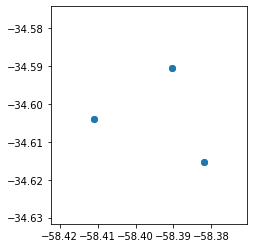

In [82]:
# El obtejo GeoDataFrame cuenta con un método de ploteo. Así se hace bastante más ágil su visualización!
gdf.plot();

In [83]:
# Veamos cuál es nuestro sistema de coordenadas de referencia. Por el momento no definimos ninguno!
print(gdf.crs)

None


Lo que básicamente hace `.point_from_xy()` es crear una lista de objetos `Shapely` de clase `Point` a partir de las coordenadas geográficas que le pasamos para crear la geometría. Lo mismo obtendríamos si aplicaramos el método `Point` de `Shapely` a partir de una lista por comprensión, de esta manera:

In [84]:
# importamos el objeto Point de Shapely
from shapely.geometry import Point

In [85]:
# desempacamos lo que sucedía dentro de .point_from_xy() usando una lista por comprensión y vemos que...
[Point(x, y) for x, y in zip(da_completo.longitud, da_completo.latitud)]

Esto equivaldría al camino largo, por decirlo de alguna forma. Veamos cómo lo integramos para que nuestro DataFrame se convierta en Geo.

In [86]:
# Creamos la columna geometría y la agregamos al dataframe
geometría = [Point(x, y) for x,y in zip(da_completo.longitud, da_completo.latitud)]

In [87]:
# Definimos el sistema de coordenadas
crs="EPSG:4326"

# Creamos el GeoDataFrame
gda_completo = gpd.GeoDataFrame(da_completo, crs=crs, geometry=geometría)

In [88]:
gda_completo

,id,inicia,finaliza,total,0_amb,1_amb,2_amb,3_amb,4_amb,5_amb,latitud,longitud,geometry
0,C1024FDA,2020,2021,37,12.95,3.70,11.10,2.59,5.55,1.11,-34.590622,-58.390424,POINT (-58.39042 -34.59062)
1,C1024FDA,2021,2022,38,5.70,2.66,13.30,11.40,3.80,1.14,-34.590622,-58.390424,POINT (-58.39042 -34.59062)
2,C1171ABM,2020,2021,17,2.55,0.51,5.10,1.19,1.70,5.95,-34.603890,-58.410998,POINT (-58.41100 -34.60389)
3,C1171ABM,2021,2022,17,5.10,1.19,5.95,0.51,2.55,1.70,-34.603890,-58.410998,POINT (-58.41100 -34.60389)
4,C1097AAX,2020,2021,17,0.51,5.10,1.70,2.55,5.95,1.19,-34.615230,-58.381981,POINT (-58.38198 -34.61523)
5,C1097AAX,2021,2022,18,0.54,6.30,5.40,2.70,1.80,1.26,-34.615230,-58.381981,POINT (-58.38198 -34.61523)


Hagamos un breve paréntesis. No les parece que ahora cobra algo más de sentido lo que dijimos antes? Que los datos espaciales no dejan de ser `datos`? De ahí es que todos los métodos que vimos antes nos pueden ayudar a hacer tareas como las que vimos arriba de manera mucho más ágil y sencilla. Veamos un ejemplo más de esto...

In [89]:
# Si tenías una API key, estas variables ya las definiste más arriba.
latitud, longitud = da_completo.latitud, da_completo.longitud

# Imginemos que tenemos una columna única de coordenadas. 
coordenadas = zip(latitud, longitud)

In [90]:
# Borremos las columnas de latitud y longitud de nuestro gdf.
da_completo.drop(columns=['latitud','longitud'], inplace=True)

In [91]:
# Armemos una lista de tuplas con nuestras latitudes y longitudes para verlo en detalle...
list(coordenadas)

[(-34.590621899999995, -58.39042380000001),
 (-34.590621899999995, -58.39042380000001),
 (-34.6038897, -58.41099819999999),
 (-34.6038897, -58.41099819999999),
 (-34.615229799999994, -58.3819811),
 (-34.615229799999994, -58.3819811)]

In [92]:
# recuperemos nuestro GeoDataFrame anterior y seleccionemos todas las filas y sólo algunas columnas
gdf = gdf.iloc[:,:10] 

In [93]:
# ... y creemos una única columna de coordenadas.
gdf['coordenadas'] = list(zip(latitud,longitud))

In [94]:
gdf

,id,inicia,finaliza,total,0_amb,1_amb,2_amb,3_amb,4_amb,5_amb,coordenadas
0,C1024FDA,2020,2021,37,12.95,3.70,11.10,2.59,5.55,1.11,"(-34.590621899999995, -58.39042380000001)"
1,C1024FDA,2021,2022,38,5.70,2.66,13.30,11.40,3.80,1.14,"(-34.590621899999995, -58.39042380000001)"
2,C1171ABM,2020,2021,17,2.55,0.51,5.10,1.19,1.70,5.95,"(-34.6038897, -58.41099819999999)"
3,C1171ABM,2021,2022,17,5.10,1.19,5.95,0.51,2.55,1.70,"(-34.6038897, -58.41099819999999)"
4,C1097AAX,2020,2021,17,0.51,5.10,1.70,2.55,5.95,1.19,"(-34.615229799999994, -58.3819811)"
5,C1097AAX,2021,2022,18,0.54,6.30,5.40,2.70,1.80,1.26,"(-34.615229799999994, -58.3819811)"


In [95]:
gdf['coordenadas'].map(Point)

0    POINT (-34.5906219 -58.39042380000001)
1    POINT (-34.5906219 -58.39042380000001)
2    POINT (-34.6038897 -58.41099819999999)
3    POINT (-34.6038897 -58.41099819999999)
4    POINT (-34.61522979999999 -58.3819811)
5    POINT (-34.61522979999999 -58.3819811)
Name: coordenadas, dtype: object

In [96]:
# Ahora, escriban ustedes cómo lo harían con apply y con una función anónima. Les dejo una pista...
# gdf['coordenadas'].apply(...)

In [97]:
# Crea tu columna de geometría por el camino que más te guste.
gdf['geometría'] = gdf['coordenadas'].map(Point)

In [98]:
# Borremos las columnas que ya no sirven
gdf.drop(columns = ['coordenadas'], inplace=True)

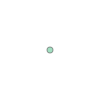

In [99]:
# Y acá nuestro primer objeto Shapely de tipo Point. Vemos que se accede de igual forma que a una fila normal.
gdf['geometría'][0]

In [100]:
# Y que tiene atributos propios como una latitud
gdf['geometría'][0].y

-58.39042380000001

In [101]:
# ... y una longitud
gdf['geometría'][0].x

-34.590621899999995

Antes, dejamos pasar por alto algo que es extremadamente importante en el mundo Geo. Recuerdan que cuando agregamos nuestra columna de geometrías por primera vez, mencionamos algo que se llama `sistema de coordenadas de referencia` o `crs`(coordinate reference system, porque lo usamos en inglés). Antes de seguir avanzando, es importante que nos tomemos unos minutos para entender brevemente de qué se trata eso.

### Proyecciones cartográficas

Un mapa es, básicamente, una representación de la Tierra en superficie plana. Para poder establecer esta correspondencia, es que existen los sistemas de proyección cartográfica. Para traducir en un plano una superficie que sigue una forma esférica o elipsoidal. Y para la cual, resulta indispensable llevar a cabo algún tipo de transformación. Empecemos por ver en qué proyección se encuentra nuestro dataframe de desarrollos anuales.

In [102]:
# Se acuerdan que definimos un '4326'? El método 'crs' nos permite acceder a la proyección de nuestro objeto.
gda_completo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Existen distintas maneras de ajustar un elipsoide a un plano. Aunque ninguna de ellas sin generar algún tipo de distorsión en la forma que buscamos adaptar. También por eso es que existen distintas proyecciones. Porque cada una conserva mejor cierto tipo de propiedad antes que otra. Lo que significa que alguna pueda resultar mejor según el lugar y la transformación que deba sufrir el globo para representarlo. Tal es así que algunos lugares desarrollan sus propias proyecciones con los fines de aminorar distorsiones en ángulos, distancias, etc..   

Una proyección bastante común es la que se conoce como cilíndrica. Esta lleva los meridianos y los paralelos a un cilindro tangente al ecuador del globo. Sin dudas, la más conocida es la proyección `Mercator`. Esta dispone los meridianos en líneas rectas verticales y los paralelos en líneas rectas horizontales. Ambos perpendiculares entre sí, conformando un sistema de coordenadas de tipo cartesiano. Al ser tangente al ecuador deforma las distancias entre los meridianos, aumentando su ancho real cada vez más a medida que se acerca a los polos (razón por la que no suele ser muy empleada en mapas de latitudes extremas).

![ARTMERCATOR](imagenes/mercator.jpeg)

**WARNING**: Esta sección no pretende ahondar mucho más en los sistemas de coordenadas de referencia. Simplemente sobrevolaremos sobre aquellas áreas que nos permitan resolver lo meramente práctico y entender lo fundamental. Si te interesa ir un poco más allá, esta [documentación](https://docs.qgis.org/3.4/en/docs/gentle_gis_introduction/coordinate_reference_systems.html) es un buen punto de inicio para completar conceptos que no abordaremos en este notebook.

Además de `Mercator` otra proyección cilíndrica es la `Tranverse Mercator` o UTM (de Universal). Este sistema, se caracteriza por apoyar el cilindro de proyección sobre el meridiano (en lugar del ecuador). Una variación de este sistema es el que se utiliza en nuestro territorio nacional: la proyección `Gauss – Krüger`. Esta es una de las reconocidas y utilizadas por el Instituto Geográfico Nacional - IGN. Podés consultar algo más de información en su [web](https://www.ign.gob.ar/NuestrasActividades/ProduccionCartografica/sistemas-de-proyeccion).

![NORMAL](imagenes/mercator_normal.png)

![NORMAL](imagenes/mercator_t.png)

Este sistema de proyección divide a la [Argentina en 7 fajas](https://gist.github.com/jkutianski/6532516#file-readme-md) meridianas numeradas de oeste a este. Cada faja de la grilla Gauss-Krüger mide 3° de ancho (longitud) por 34o de largo (latitud) y tiene como propio origen la intersección del Polo Sur con el meridiano central de cada faja. Con el objeto de evitar coordenadas
negativas, se le asigna al meridiano central de cada faja el valor arbitrario de 500.000 metros y al Polo Sur el valor cero metros.

<tr>
    <td> <img src="imagenes/gaussKrugerFajas.jpg" alt="Drawing" style="width: 350px;"/> </td>
    <td> <img src="imagenes/fajas_por_provincia.png" alt="Drawing" style="width: 500px;"/> </td>
</tr

Si querés explorar un poco más sobre el formato de coordenadas de la Ciudad de Buenos Aires, acá dejamos algo de [documentación](https://recursos-data.buenosaires.gob.ar/ckan2/proyecciones-gkba.pdf) sobre [SR-ORG:7124: Gauss-Kruger Bs.As.](http://spatialreference.org/ref/sr-org/7124/). 

In [103]:
argentina = gpd.read_file('carto/provincia.shp')

Este archivo que acabamos de cargar se conoce como `shapefile`, algo ampliamente utilizado en el mundo de los SIG de escritorio como `QGIS` y `Arcgis`. Es una archivo de datos espaciales desarrollado por la compañía ESRI y está compuesto, entre otras tantas extensiones, por una lista de vértices de la forma (o `.shp`), una base de datos (o `.dbf`) y una proyección (o `.prj`) - acá dejamos una [descripción más completa](https://www.loc.gov/preservation/digital/formats/fdd/fdd000280.shtml). Así como un `shapefile` tiene un archivo `.prj` para definir su proyección, uno de los atributos principales de un GeoDataFrame es el `crs` o sistema de coordenadas en el que está proyectado. De esto dependerán las unidades en las que hagamos los distintos tipos de operaciones y también la forma en la que se plotearán nuestros resultados.

In [104]:
# veamos el CRS de nuestro shape
argentina.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

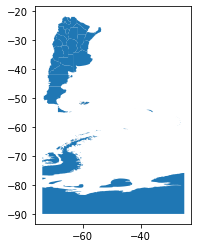

In [105]:
# cómo se ve en 4326? Notan cómo está menos estilizado - o más aplanado?
argentina.plot();

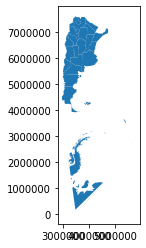

In [106]:
# Ahora redefinamos la proyección. La faja 3 es la que se usa para plotear todo el país...
argentina.to_crs('epsg:22183').plot();

In [107]:
# También podemos redefinir la proyección así
argentina.crs = 22183

In [108]:
argentina.crs

<Projected CRS: EPSG:22183>
Name: POSGAR 94 / Argentina 3
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Argentina - 67.5°W to 64.5°W onshore
- bounds: (-67.5, -55.11, -64.49, -21.78)
Coordinate Operation:
- name: Argentina zone 3
- method: Transverse Mercator
Datum: Posiciones Geodesicas Argentinas 1994
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [109]:
# Otra manera de redefinir nuestro CRS, con el objeto CRS de pyproj
from pyproj import CRS

In [110]:
# volvamos a WGS84
argentina.crs = CRS(4326)

In [111]:
CRS(argentina.crs)

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Pero qué es esto de `WGS` y `EPSG`? World Geodesic System es, como indican sus siglas en inglés, un sistema de referencia global. Fue desarrollado en la década de los ochenta por la Agencia de Defensa de los Estados Unidos y es ampliamente utilizado en todo el mundo. En Argentina, también se utiliza la Red Geodésica Nacional [POSGAR](https://www.ign.gob.ar/NuestrasActividades/Geodesia/Introduccion). Esto es, un [sistema de referencia local](https://ramsac.ign.gob.ar/posgar07_pg_web/documentos/Informe_sobre_codigos_oficiales_EPSG.pdf).  Y dado que cada país o región puede tener el propio es que existen estandarizaciones como la que disponibiliza la [EPSG](http://www.epsg.org/), una organización que nuclea y distribuye codificaciones para identificar y trabajar con distintos sistemas de referencia.

Detengámonos un poco más acá. Es importante aclarar que la release de geopandas con la que estamos trabajando en este notebook es la `v0.7.0`. Respecto de las [anteriores](https://github.com/geopandas/geopandas/releases), un cambio importante que se ha incluído en esta es que ahora se utiliza un nuevo tipo de objeto para trabajar con el CRS. Esto significa que la sintáxis para definir el sistema de coordenadas de referencia es algo diferente. Veamos un ejemplo para ilustrarlo...

In [112]:
# retomemos nuestro geodataframe de desarrollos y definamos el CRS a partir de un diccionario.
gda_completo.crs = {'init': 'epsg:4326'}

/home/federico/CoDeAr/curso-python-data/Clase 7/venv/lib/python3.6/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [113]:
gda_completo.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Si le prestamos atención al warning, la forma de definir el CRS difiere respecto de las releases anteriores. Y esto sucede básicamente porque la `v0.7.0` ahora trabaja con una versión distinta de `pyproj`(2.x). Antes, el CRS (que recordemos es un atributo dela GeoDataFrame) se guardaba como un `proj4 string` o un diccionario que contenía su información como vimos más arriba. Con esta nueva versión, esto cambia y se trabaja con un nuevo tipo de objeto enriquecido: `pyproj.CRS`.  

In [114]:
# Veamos la versión de pyproj
import pyproj
print('pyproj version:'+pyproj.__version__)

pyproj version:2.5.0


In [115]:
pyproj.CRS("EPSG:4326")

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [116]:
# Exploremos otros CRS...
pyproj.CRS("EPSG:31370")

<Projected CRS: EPSG:31370>
Name: Belge 1972 / Belgian Lambert 72
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Belgium - onshore
- bounds: (2.5, 49.5, 6.4, 51.51)
Coordinate Operation:
- name: Belgian Lambert 72
- method: Lambert Conic Conformal (2SP)
Datum: Reseau National Belge 1972
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

[Pyproj](https://pypi.org/project/pyproj/) es la dependencia de la que dispone Geopandas para trabajar con distintas representaciones geográficas. En la [documentación](https://geopandas.org/projections.html) de la última release y en esta [gitpage](https://jorisvandenbossche.github.io/blog/2020/02/11/geopandas-pyproj-crs/) de uno de sus principales contribuyentes se explican las diferencias y ganancias en esta nueva forma de definir proyecciones respecto de las anteriores. También te dejamos la documentación de [instalación de `Geopandas`](https://geopandas.org/install.html). Te recomendamos que la leas, la instalación de esta librería depende mucho del sistema operativo con el que estés trabajando. Si estás usando un `requirements.txt` para instalar las librerías de esta clase asegurate de tener instalado `shapely`, `pyproj`, `fiona` y `rtree` (ver `installing with pip` warning). 

> **2. Líneas**

El `Punto` no es el único objecto geométrico con el que cuenta `Shapely`. Además, están las `líneas` (en inglés suelen denominarse `curves`). Los distintos objetos geométricos de `Shapely` se implementan a partir de diferentes clases. Así como el punto lo hace a través de `Point`, las líneas utilizan `LineString` y `LinearRing`. Otra cuestión importante es que mientras la clase `Point` se compone de un interior de exactamente un punto, el interior de las líneas está compuesto por infinitos puntos a lo largo de su extensión. También tienen un límite, compuesto por sus dos puntos extremos. Esto hace que la dimensión topológica de una `línea` sea de 1, como se ve a continuación:

![DIMENSIONESTOPOLOGICAS](imagenes/dimensiones.png)

Armemos algunas líneas para hacer estos conceptos un poco más tangibles. Supongamos ahora que queremos estudiar la distancia que separa a los tres desarrollos con los que estamos trabajando. Para eso, primero vamos a crear un set de líneas a partir de los puntos trabajados y calcular la longitud de las mismas para aproximarnos a la distancia aérea que los separa. Veamos cómo se hace.

In [117]:
from shapely.geometry import LineString

In [118]:
# recuperemos nuestras longitudes 
nortng = [gdf.geometría[i].x for i in gdf.geometría.index]

In [119]:
nortng = pd.Series(nortng).unique()

In [120]:
# ...y nuestras latitudes
eastng = [gdf.geometría[i].y for i in gdf.geometría.index]

In [121]:
eastng = pd.Series(eastng).unique()

Nosotros queremos obtener la línea que va de cada desarrollo a todos sus vecinos. Es decir, queremos ir de un inicio a un fin empezando desde cada uno de los puntos. Por ende, debemos considerar de cuántas posibles maneras estos se pueden combinar. Veámoslo...

In [122]:
# Construimos una función para multiplicar un nro desde uno hasta sí mismo. Es decir, el factorial.
def factorial(n):
    '''
    Multiplica un nro. desde 1 hasta sí mismo.
    ...
    Argumentos:
        n(int): entero.
    Devuelve:
        int: factorial de un numero. 
    '''
    f = 1
    for i in range(1, n + 1):
        f *= i
    return f

Como sabemos, existen dos maneras de ordenar objetos. Por un lado las permutaciones y por el otro las combinaciones. A diferencia de la primera, en esta última la forma u orden en la que se agrupan los resultados de eventos dependientes no importa. Por ejemplo, en nuestro caso, la distancia de A a B sería lo mismo que la de B a A. 

Por eso, para saber de cuántas formas se pueden combinar nuestros puntos de desarrollos utilizaremos la siguiente fórmula: **n!/(n-k)!k!**

In [123]:
# Ahora modularizamos todo en una función para conocer de cuántas formas se pueden combinar nuestros puntos.
def combinaciones(n):
    '''
    Estima la cantidad de combinaciones utilizando el factorial de un entero
     ...
    Argumentos:
        n(int): entero.
    Devuelve:
        int: cntidad de combinaciones
    '''    
    return factorial(n)/((factorial(n-(n-1)))*(factorial((n-1))))

In [124]:
print('Nuestro DataFrame de desarrollos posee %s combinaciones posbles' % int(combinaciones(3)))

Nuestro DataFrame de desarrollos posee 3 combinaciones posbles


Es decir, que podemos ir del punto 1 al 2, del 2 al 3 y del 3 al 1. Construyamos ahora un set de tres líneas siguiendo esta regla...

In [155]:
def construye_linea(n):
    '''
    Construye una línea a partir de las coordenadas
    de un punto.
     ...
    Argumentos:
        n(int): posición de la coordenada en una lista.
    Devuelve:
        LineString
    '''    
    try:
        I = Point(eastng[n],nortng[n])
        F = Point(eastng[n+1],nortng[n+1])
        linea = LineString([I,F])
    
    except:
        I = Point(eastng[n],nortng[n])
        F = Point(eastng[0],nortng[0])
        linea = LineString([I,F])
    
    return linea

Antes de continuar, acá estamos viendo algo nuevo: las declaraciones `try` y `except`. Sencillamente, lo que sucede dentro de esta función es que primero se ejecuta el código que se encuentra dentro del bloque `try`. De no ocurrir ninguna excepción, el segundo bloque se saltea y la ejecución termina en la declaración `try`. De lo contrario, esta termina en la excepción y continúa en el bloque de código posterior a la palabra reservada `except`. En nuestro ejemplo, como las listas easting y norting tienen sólo 3 elementos, si utilizáramos un número superior como parámetro, el código podría bien devolver un mensaje de error (muchas veces el `except` se utiliza para especificar uno) o simplemente ejecutar algo diferente. En nuestro caso, decidimos utilizar este bloque para determinar que la línea termine en las coordenadas iniciales de nuestras listas. Veamos cómo quedó...

In [156]:
tramo1 = construye_linea(0)

In [157]:
type(tramo1)

shapely.geometry.linestring.LineString

In [158]:
list(tramo1.coords)

[(-58.39042380000001, -34.590621899999995), (-58.41099819999999, -34.6038897)]

In [159]:
geometrias = [construye_linea(i)for i in range(0,3)]   

In [160]:
geometrias

In [161]:
ids = gdf.id.unique()

In [162]:
gdf_lineas = pd.DataFrame({'id':ids, 'geometria':geometrias})

In [163]:
# aún sólo tenemos un dataframe
type(gdf_lineas)

pandas.core.frame.DataFrame

In [164]:
# procedamos a convertirlo en geo
from geopandas import GeoDataFrame

In [165]:
# creamos nuestro geodataframe de líneas entre desarrollos
lin_des = GeoDataFrame(gdf_lineas, geometry='geometria')

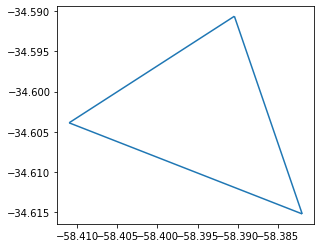

In [166]:
lin_des.plot();

Veamos en detalle los que estuvimos haciendo. Como se puede apreciar...

In [167]:
# Este es nuestro geodataframe,
lin_des['geometria']

0    LINESTRING (-58.39042 -34.59062, -58.41100 -34...
1    LINESTRING (-58.41100 -34.60389, -58.38198 -34...
2    LINESTRING (-58.38198 -34.61523, -58.39042 -34...
Name: geometria, dtype: geometry

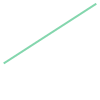

In [168]:
# tal como el objeto Point, así luce un LineString
lin_des.loc[lin_des['id']=='C1024FDA']['geometria'][0]

In [169]:
# También posee un largo,
lin_des.loc[lin_des['id']=='C1024FDA']['geometria'][0].length

0.024481430762914695

In [170]:
# valor que está supeditado a la proyección que estemos utilizando. Nosotros no asignamos ninguno,
print(lin_des.crs)

None


In [171]:
# así que hagámoslo.
lin_des.crs = CRS(4326)

In [172]:
lin_des.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [173]:
# Y vemos las diferencias de unidades entre una
lin_des.loc[lin_des['id']=='C1024FDA']['geometria'][0].length

0.024481430762914695

In [174]:
# y otra preyección.
lin_des.to_crs(22183).loc[lin_des['id']=='C1024FDA']['geometria'][0].length

2407.7860488102215

In [175]:
# Como mencionamos previamente una línea posee un set de límites o puntos extremos.
list(lin_des.loc[lin_des['id']=='C1024FDA']['geometria'][0].coords)

[(-58.39042380000001, -34.590621899999995), (-58.41099819999999, -34.6038897)]

In [176]:
# o simplemente pensémoslo como una sucesión de puntos 
lin_des.loc[lin_des['id']=='C1024FDA']['geometria'][0].coords[0]

(-58.39042380000001, -34.590621899999995)

In [177]:
# en la que puede haber más coordenadas que sólo las extremas si consideramos 'n' veces '.coords[n]'
lin_des.loc[lin_des['id']=='C1024FDA']['geometria'][0].coords[1]

(-58.41099819999999, -34.6038897)

In [178]:
# A los que también podemos acceder con el método xy
lin_des.loc[lin_des['id']=='C1024FDA']['geometria'][0].xy

(array('d', [-58.39042380000001, -58.41099819999999]),
 array('d', [-34.590621899999995, -34.6038897]))

Esto deja en claro que una `línea` también puede ser vista como una sucesión infinita de puntos.

In [179]:
# Otro atributo importante es su centroide. Este suele ser muy útil cuando querramos pasar de LineString a Point.
list(lin_des.loc[lin_des['id']=='C1024FDA']['geometria'][0].centroid.coords)

[(-58.40071100000001, -34.5972558)]

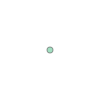

In [180]:
lin_des['geometria'][0].centroid

In [181]:
# como vemos, es un punto.
type(lin_des['geometria'][0].centroid)

shapely.geometry.point.Point

Veamos cómo pueden servirnos estos métodos y atributos que estuvimos revisando. Como dijimos, las líneas que construimos son una forma de representar la distancia aérea que separa a los desarrollos inmobiliarios entre sí. Asimismo, vimos que era posible construir tres líneas, sabiendo que la columna id representa el correo postal o dirección de salida de cada uno de esos recorridos. Pero lo que no sabemos, es con qué destino quedó unido. Es decir, sabemos que ir de `C1024FDA` a `C1171ABM` es lo mismo que ir de `C1171ABM` a `C1024FDA`. Por eso, para completar aún más nuestro geodataframe, intentemos agregar el punto de inicio y de fin de cada línea.

In [182]:
lin_des

,id,geometria
0,C1024FDA,"LINESTRING (-58.39042 -34.59062, -58.41100 -34..."
1,C1171ABM,"LINESTRING (-58.41100 -34.60389, -58.38198 -34..."
2,C1097AAX,"LINESTRING (-58.38198 -34.61523, -58.39042 -34..."


In [183]:
def destino(n):
    '''
    Identifica el código postal del punto del 
    extremo superior de la línea de distancia.
     ...
    Argumentos:
        n(int): índice de la geometría.
    Devuelve:
        str: código postal de destino
    '''    
    try:
        F = list(lin_des['geometria'][n].coords[1])
        I = list(lin_des['geometria'][n+1].coords[0])

        if F == I:
            destino = lin_des['id'][n+1]
            return destino
    except:
        F = list(lin_des['geometria'][n].coords[1])
        I = list(lin_des['geometria'][n-n].coords[0])

        if F == I:
            destino = lin_des['id'][n-n]
            return destino

In [184]:
destino(0)

'C1171ABM'

In [185]:
destinos = [destino(i) for i in range(len(lin_des))]

In [186]:
lin_des['destino'] = destinos

In [187]:
lin_des

,id,geometria,destino
0,C1024FDA,"LINESTRING (-58.39042 -34.59062, -58.41100 -34...",C1171ABM
1,C1171ABM,"LINESTRING (-58.41100 -34.60389, -58.38198 -34...",C1097AAX
2,C1097AAX,"LINESTRING (-58.38198 -34.61523, -58.39042 -34...",C1024FDA


In [188]:
# renombramos sus columnas
lin_des.rename(columns={'id':'origen'}, inplace=True)

In [189]:
# y le cambiamos el orden
lin_des = lin_des[['origen', 'destino', 'geometria']]

Calculemos ahora la distancia que existe entre cada par origen-destino. Es decir, la longitud de nuestras líneas. Vamos a utilizar la proyección del escenario donde estamos trabajando - el de la Ciudad de Buenos Aires, recordemos que compartimos el link con su información más arriba cuando abordamos los SRC -. 

Al respecto, vale aclarar que este se encuentra en metros. Existen otras proyecciones que también utilizan el mismo sistema de medida, por ejemplo la EPSG:3857. Esta es de alcance global y por ende suele ser de uso más generalizado. Pero como queremos ganar algo más de precisión vamos a utilizar la propia de nuestro caso de análisis (la proyección óptima depende depende de la ubicación en el globo).

In [190]:
# veamos el resultado en EPSG 3857
lin_des.to_crs(3857).geometria.apply(lambda x: x.length)

0    2909.461780
1    3575.822502
2    3458.205004
Name: geometria, dtype: float64

Como mencionamos anteriormente, una de las características de la nueva release de Geopandas es que enriquece el sistema de coordenadas con información adicional. Esta nueva forma de trabajar con [proyecciones](https://geopandas.org/projections.html) también permite manipular las dos representaciones más comunes de la nomenclatura EPSG:[proj4](https://spatialreference.org/ref/sr-org/7124/proj4/) y well known text o [WKT](https://spatialreference.org/ref/sr-org/7124/prettywkt/). Aquí disponibilizamos los de de la Ciudad de Buenos Aires, pero esta web es muy útil para consultar los de diversas parte del mundo (uno nunca sabe con qué parte del globo va a trabajar!).

In [191]:
# y la instanciamos en un string. En este caso no usamos un código EPSG
proj4 = '+proj=tmerc +lat_0=-34.629269 +lon_0=-58.4633 +k=0.9999980000000001 +x_0=100000 +y_0=100000 +ellps=intl +units=m +no_defs' 

In [192]:
# definamos nuestro nuevo crs
proj4_bsas = pyproj.CRS(proj4)

In [193]:
# como dijimos, ahora es un objeto enriquecido
proj4_bsas

<Projected CRS: +proj=tmerc +lat_0=-34.629269 +lon_0=-58.4633 +k=0 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Transverse Mercator
Datum: Unknown based on International 1909 (Hayford) ellipsoid
- Ellipsoid: International 1909 (Hayford)
- Prime Meridian: Greenwich

In [194]:
# con el método .source_crs, también podemos conocer un resumen de nuestro crs
proj4_bsas.source_crs

<Geographic 2D CRS: GEOGCRS["unknown",DATUM["Unknown based on Internat ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: Unknown based on International 1909 (Hayford) ellipsoid
- Ellipsoid: International 1909 (Hayford)
- Prime Meridian: Greenwich

In [195]:
# y conseguir su EPSG equivalente. En nuestro caso, el CRS de BsAs no posee esa nomenclatura.
print(proj4_bsas.to_epsg())

None


In [196]:
# Ahora, repliquemos lo mismo pero con el formato WKT.
wkt = """PROJCS["GKBA",
        GEOGCS["International 1909 (Hayford)",
            DATUM["CAI",
                SPHEROID["intl",6378388,297]],
            PRIMEM["Greenwich",0],
            UNIT["degree",0.0174532925199433]],
        PROJECTION["Transverse_Mercator"],
        PARAMETER["latitude_of_origin",-34.6297166],
        PARAMETER["central_meridian",-58.4627],
        PARAMETER["scale_factor",0.999998],
        PARAMETER["false_easting",100000],
        PARAMETER["false_northing",100000],
        UNIT["Meter",1]]"""

In [197]:
wkt_bsas = pyproj.CRS(wkt)

In [198]:
wkt_bsas.source_crs

<Geographic 2D CRS: GEOGCRS["International 1909 (Hayford)",DATUM["CAI" ...>
Name: International 1909 (Hayford)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: CAI
- Ellipsoid: intl
- Prime Meridian: Greenwich

In [199]:
print(wkt_bsas.to_epsg())

None


In [200]:
# Ahora, utilicemos la nueva proyeccion y calculemos cada recorrido respetando su unidad de referencia (metros)
lin_des.to_crs(proj4_bsas).geometria.apply(lambda x: x.length)

0    2393.496203
1    2943.889346
2    2837.628118
Name: geometria, dtype: float64

In [201]:
lin_des.to_crs(wkt_bsas).geometria.apply(lambda x: x.length)

0    2393.496184
1    2943.889322
2    2837.628091
Name: geometria, dtype: float64

Como se puede apreciar, el cálculo de distancia difiere levemente entre ambos sistemas de coordenadas. Ahora, creemos una columna de nuestro dataframe de líneas con su atributo de distancia.

In [202]:
lineas = lin_des.copy()
lineas['distancia'] = lineas.to_crs(wkt_bsas).geometria.apply(lambda x: x.length)

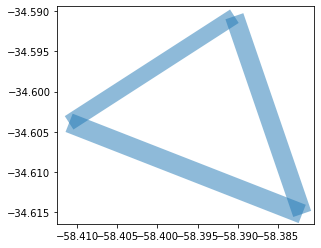

In [203]:
# Y veamos ahora dónde está el recorrido más largo. Se ve claramente que este es entre los CP 1024 y 1171
lineas.plot(linewidth = lineas.distancia/150,alpha = 0.5);

Pero,¿cómo haríamos si, en lugar de la distancia entre extremos (es decir, todo el largo de la línea), quisiéramos establecer la distancia entre un punto y otro siempre estando dentro del recorrido de la misma línea? Vayamos con otro ejemplo de un caso puntual...

In [204]:
def dist_en_linea(proj, linea, idx_a, idx_b):
    '''
    Calcula la distancia entre dos puntos 
    determinados de una línea
     ...
    Argumentos:
        proj(crs): Sistema de coordenadas de referencia 
        linea(int): Posición o nro de línea del gdf. 
        idx_a(int): Posición de la coordenada inicial.
        idx_b(int): Posición de la coordenada final.
    Devuelve:
        float: distancia lineal
    '''    
    gse= lineas.to_crs(proj)['geometria']
    A=Point(gse[linea].coords[idx_a])
    B=Point(gse[linea].coords[idx_b])
    
    return A.distance(B)

In [205]:
# aca tenemos la distancia en metros entre las coordenadas 0 y 1 de la primer línea de nuestro gdf
dist_en_linea(proj4_bsas, 0, 0, 1)

2393.4962029205976

En el caso de haber tenido una mayor cantidad de coordenadas (o una línea compuesta por múltiples puntos), la función anterior nos hubiese permitido indexar más allá de 0 y 1 (que son el inicio y el fin de la línea). Suponiendo que hubiese tenido un punto intermedio, hubiese sido posible medir la distancia entre 0 y 1 como así también entre 1 y 2. Pero nuestra línea sólo tiene un par de coordenadas. 

Con esto, introducimos un nuevo concepto: el `sistema de referencia lineal` o `linear reference system`. Este nos habría permitido conocer cosas útiles como... 

In [206]:
# a qué distancia sobre la línea se encuentra cada punto.
inicio = lineas.to_crs(proj4_bsas)['geometria'][0].coords[0]
fin =  lineas.to_crs(proj4_bsas)['geometria'][0].coords[1]

In [207]:
# Esto, con el método project. 
lineas.to_crs(proj4_bsas)['geometria'][0].project(Point(fin))

2393.4962029205976

In [208]:
# Con el parámetro normalized también podemos ver qué porcentage de la línea representa la distancia de ese punto
lineas.to_crs(proj4_bsas)['geometria'][0].project(Point(fin), normalized=True)

1.0

In [209]:
# O bien qué coordenadas corresponden a cierta distancia sobre la línea
distancia = lineas.to_crs(proj4_bsas)['geometria'][0].project(Point(fin))
print(lin_des.to_crs(proj4_bsas)['geometria'][0].interpolate(distancia))

POINT (104797.6311345034 102814.236456377)


Este conjunto de métodos resultan altamente útiles cuando trabajamos sobre la misma línea. Como vimos con las coordenadas del caso anterior, un indicador que hubiesemos podido construir es la distancia en línea recta al 100% de su recorrido. También, agregando algunas coordenadas intermedias más tendríamos la posibilidad de conocer la distancia al 25, 50 o bien el 75% de su recorrido. Esto, por mencionar sólo un ejemplo.

> **3. Polígonos**

Antes de hablar estrictamente de la clase `Polygon`, haremos una breve mención a la clase `LinearRing`. Como dijimos anteriormente esta era una de las clases con las que se implementaban las líneas. Ahora bien, ¿por qué la mencionamos en esta sección? Una linea con el mismo punto de inicio y fin no es un `LineString` pero tampoco es un `Polygon`. Ahora bien, la clase [LinearRing](https://shapely.readthedocs.io/en/latest/manual.html#LinearRing) representa uno de los atributos principales de un polígono: su borde. Por eso es que ambas clases se encuentran estrechamente vnculadas. Un polígono es una superficie circunscripta a un límite. Por ende, es posible pasar de una a otra con cierta facilidad. Fijémosno cómo...

In [210]:
from shapely.geometry import LinearRing

In [211]:
# construyamos un anillo de ejemplo tomando como referencia nuestras coordenadas de distancia
anillo = LinearRing([lineas['geometria'][0].coords[0], 
                     lineas['geometria'][1].coords[0], 
                     lineas['geometria'][2].coords[0]])

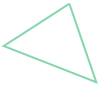

In [212]:
anillo

In [213]:
type(anillo)

shapely.geometry.polygon.LinearRing

In [214]:
anillo.is_ring

True

In [215]:
anillo.area

0.0

In [216]:
# este es, tal vez, el atributo más importante: su largo
anillo.length

0.08165164034784368

In [217]:
from shapely.geometry import Polygon

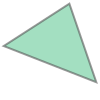

In [218]:
# Ahora pasemos de un LinearRing a un Polygon
Polygon(anillo)

Volviendo a la clase `Polygon`, el [modelo de datos espaciales](https://shapely.readthedocs.io/en/latest/manual.html#spatial-data-model) de shapely lo define como una superficie compuesta por un conjunto interior de infinitos puntos delimitado por una o más curvas y un conjunto exterior de infitos puntos. Esta geometría tiene una dimensión topológica de 2. [Acá](https://automating-gis-processes.github.io/site/2018/notebooks/L1/geometric-objects.html) dejamos una descripción más detalladas de todos los objetos geométricos de shapely.

Levantemos un geodataframe de polígonos y veamos qué características y métodos tienen...

In [219]:
# trabajemos con un shape de barrios
barrios = gpd.read_file('carto/barrios_badata.shp')

In [220]:
barrios.head()

,BARRIO,COMUNA,PERIMETRO,AREA,OBJETO,geometry
0,CHACARITA,15.0,7724.852955,3.115707e+06,BARRIO,"POLYGON ((100961.338 103691.974, 100884.721 10..."
1,PATERNAL,15.0,7087.513295,2.229829e+06,BARRIO,"POLYGON ((99791.104 103628.888, 99787.132 1036..."
2,VILLA CRESPO,15.0,8131.857075,3.615978e+06,BARRIO,"POLYGON ((103627.714 103487.358, 103517.533 10..."
3,VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06,BARRIO,"POLYGON ((97128.440 101597.513, 97112.315 1015..."
4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO,"POLYGON ((104625.143 101679.935, 104629.994 10..."


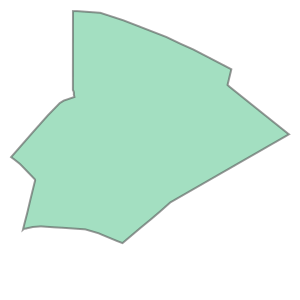

In [221]:
# así luce el barrio de Chacarita
barrios.geometry[0]

In [222]:
# Como dijimos, un polígono está compuesto por una superficie interna o área
print('El barrio de Chacarita tiene una superficie de %r m2' % int(barrios.geometry[0].area))

El barrio de Chacarita tiene una superficie de 3115707 m2


In [223]:
# el shape de barrios con el que estamos trabajando ya se encuentra proyectado en Transverse Mercator
int(barrios.to_crs(proj4_bsas).geometry[0].area)

3115707

In [224]:
# se puede ver que el mismo ya se encuentra en metros, por lo que no es necesario reproyectarlo..
barrios.crs

<Projected CRS: PROJCS["Argentina_GKBsAs",GEOGCS["GCS_Campo_Inchau ...>
Name: Argentina_GKBsAs
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Campo Inchauspe
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [225]:
# Un polígono también tiene un límite exterior - o un LinearRing -,  
type(barrios.geometry[0].exterior)

shapely.geometry.polygon.LinearRing

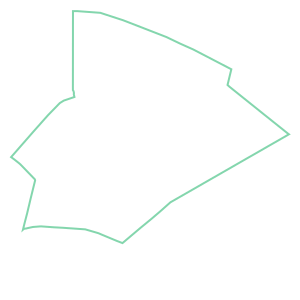

In [226]:
barrios.geometry[0].exterior

In [227]:
# que como dijimos cuenta con una extensión o largo determinada - su perímetro.
barrios.geometry[0].exterior.length

7724.8529545663605

In [228]:
# Un polígono también tiene un interior (o islas)
barrios.interiors

0                                                    []
1                                                    []
2                                                    []
3                                                    []
4                                                    []
5                                                    []
6                                                    []
7                                                    []
8                                                    []
9                                                    []
10                                                   []
11                                                   []
12                                                   []
13                                                   []
14                                                   []
15                                                   []
16                                                   []
17                                              

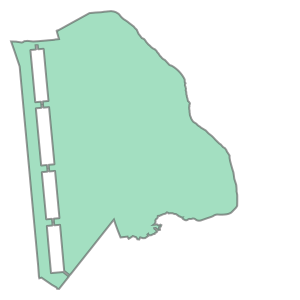

In [229]:
# veamos cómo se ve ese polígono (que no es más que un polígono con LinearRings en su interior)
barrios.geometry[40]

Para terminar con esta práctica, veamos de qué manera se pueden relacionar las tres geometrías que hemos visto. Para ello introduciremos un método muy útil, el [join espacial](https://geopandas.org/reference/geopandas.sjoin.html) de `geopandas`. Este método nos va a permitir ver, en primera instancia, en qué barrio cae cada uno de los desarrollos inmobiliarios que hemos creado.

In [230]:
# importamos el método join espacial
from geopandas import sjoin 

In [231]:
# recuperamos nuestro shape de puntos
puntos = gda_completo.to_crs(barrios.crs).loc[gda_completo.inicia==2021]

In [232]:
# este método no nos concatena los geodataframes. También nos devuelve el índice del objeto unido
gpd.sjoin(puntos, barrios)

,id,inicia,finaliza,total,0_amb,1_amb,2_amb,3_amb,4_amb,5_amb,latitud,longitud,geometry,index_right,BARRIO,COMUNA,PERIMETRO,AREA,OBJETO
1,C1024FDA,2021,2022,38,5.70,2.66,13.30,11.40,3.80,1.14,-34.590622,-58.390424,POINT (106685.658 104284.995),44,RECOLETA,2.0,21452.838648,6.317265e+06,BARRIO
3,C1171ABM,2021,2022,17,5.10,1.19,5.95,0.51,2.55,1.70,-34.603890,-58.410998,POINT (104797.398 102814.314),24,BALVANERA,3.0,8375.821811,4.342280e+06,BARRIO
5,C1097AAX,2021,2022,18,0.54,6.30,5.40,2.70,1.80,1.26,-34.615230,-58.381981,POINT (107458.012 101554.571),41,MONSERRAT,1.0,6739.222311,2.198622e+06,BARRIO


In [233]:
# instanciamos nuestro gdf de puntos con su etiqueta de barrios
ptos_barrio = gpd.sjoin(puntos, barrios)

In [234]:
# utilizamos el right index para filtrar los barrios en lo que cae cada punto
[barrios.index[i] for i in ptos_barrio['index_right']]

[44, 24, 41]

In [235]:
# usamos esa lista para indexar nuestro gdf de barrios
barrios.loc[[barrios.index[i] for i in ptos_barrio['index_right']]]

,BARRIO,COMUNA,PERIMETRO,AREA,OBJETO,geometry
44,RECOLETA,2.0,21452.838648,6.317265e+06,BARRIO,"POLYGON ((107643.458 106569.299, 107641.492 10..."
24,BALVANERA,3.0,8375.821811,4.342280e+06,BARRIO,"POLYGON ((104713.283 103467.380, 104862.315 10..."
41,MONSERRAT,1.0,6739.222311,2.198622e+06,BARRIO,"POLYGON ((108667.802 102485.741, 108727.534 10..."


In [236]:
# guardamos nuestros barrios filtrados
barrios_filtro = barrios.loc[[barrios.index[i] for i in ptos_barrio['index_right']]]

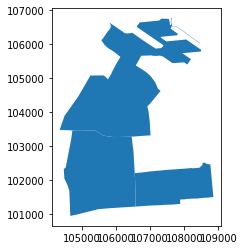

In [237]:
barrios_filtro.plot();

En esta práctica no vamos a profundizar en visualizaciones, pero adelantemonos a lo que sigue previsualizando cómo quedarían nuestros desarrollos en un contexto un poco más completo. Para ello, visualicemos dónde se localizan...

In [238]:
import matplotlib.pyplot as plt
%matplotlib inline

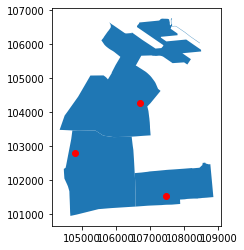

In [239]:
# creamos la figura y el eje y ploteamos
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
barrios_filtro.plot(ax=ax)
ptos_barrio.plot(ax=ax, color='red');

Y ahora veamos cómo quedaría nuestro mapa de desarrollos si quisiéramos graduar nuestro gdf de puntos en función de la cantidad de departamos por tamaño. Así, veremos la representación de cada desarrollo graduado en calidad del porcentaje de unidades funcionales según ambientes. Veamos el ejemplo...

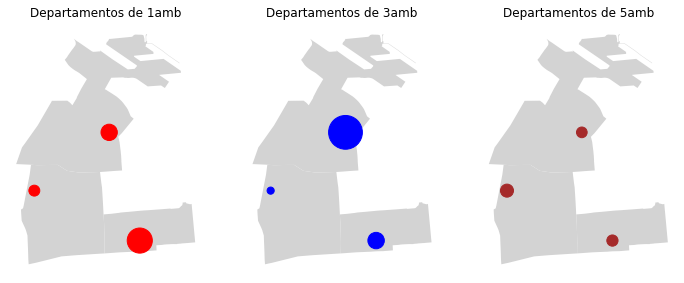

In [240]:
# Seteamos las figuras,
fig = plt.figure(figsize=(12,7))

# los ejes y ploteamos cada par de puntos/polígonos
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# axis 1
barrios_filtro.plot(ax=ax1,
                    color='lightgrey')
ptos_barrio.plot(ax=ax1, 
                 color = 'red',
                 markersize=ptos_barrio['1_amb']*100)
ax1.set_axis_off()
ax1.set_title('Departamentos de 1amb')

# axis 2
barrios_filtro.plot(ax=ax2,
                   color='lightgrey')
ptos_barrio.plot(ax=ax2, 
                 color = 'blue',
                 markersize=ptos_barrio['3_amb']*100)
ax2.set_axis_off()
ax2.set_title('Departamentos de 3amb')

# axis 3
barrios_filtro.plot(ax=ax3,
                   color='lightgrey')
ptos_barrio.plot(ax=ax3, 
                 color = 'brown',
                 markersize=ptos_barrio['5_amb']*100)
ax3.set_axis_off()
ax3.set_title('Departamentos de 5amb');

Por último, incorporemos nuestro análisis de distancias. Para eso, volvamos a construir un gdf de líneas a partir del de puntos con el que ploteamos antes.

In [241]:
def point_to_line(gdf,idx):
    '''
    Convierte una Point geometry en LineString
    a partir de un set de coordenadas de inicio y fin.
     ...
    Argumentos:
        gdf(gdf): GeoDataFrame de puntos 
        idx(int): Posición de cada geometría dentro del gdf. 
    Devuelve:
        LineString
    '''    
    x_inicio = gdf.iloc[idx].geometry.x
    y_inicio = gdf.iloc[idx].geometry.y
    
    try:
        x_fin = gdf.iloc[idx+1].geometry.x
        y_fin = gdf.iloc[idx+1].geometry.y
    except:
        x_fin = gdf.iloc[idx-idx].geometry.x
        y_fin = gdf.iloc[idx-idx].geometry.y
    
    I = (x_inicio, y_inicio)
    F = (x_fin, y_fin)
    
    new_geometry = LineString([I,F])
    return new_geometry

In [242]:
# Instanciamos las nuevas geometrías,
distancias = [point_to_line(ptos_barrio,i) for i in range(len(ptos_barrio))]

In [243]:
# hacemos una copia de nuestro gdf de puntos 
dist_barrio = ptos_barrio.copy()

In [244]:
# y pisamos la geometría de puntos con la de lineas. Ahora tenemos el recorrido aéreo entre cada punto
dist_barrio.geometry = distancias

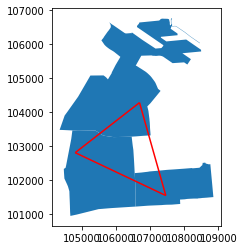

In [245]:
# Vemos cómo queda rápidamente...
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
barrios_filtro.plot(ax=ax)
dist_barrio.plot(ax=ax, color='red');

In [246]:
# Creamos el atributo de distancia con 'lenght'
dist_barrio['distancia'] = dist_barrio.geometry.length

A continuación, retomamos el código del último plot pero agregando el atributo de distancias aéreas. Reparemos en cómo se agregan los 4 subplots para cada mapa.

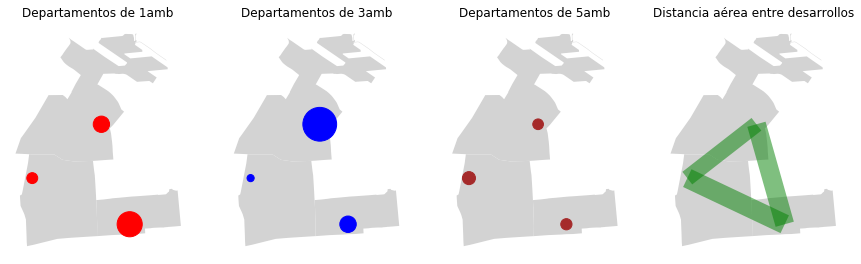

In [247]:
# Figuras y ejes,
fig = plt.figure(figsize=(15,7))

ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)

# axis 1
barrios_filtro.plot(ax=ax1,
                    color='lightgrey')
ptos_barrio.plot(ax=ax1, 
                 color = 'red',
                 markersize=ptos_barrio['1_amb']*100)
ax1.set_axis_off()
ax1.set_title('Departamentos de 1amb')

# axis 2
barrios_filtro.plot(ax=ax2,
                   color='lightgrey')
ptos_barrio.plot(ax=ax2, 
                 color = 'blue',
                 markersize=ptos_barrio['3_amb']*100)
ax2.set_axis_off()
ax2.set_title('Departamentos de 3amb')

# axis 3
barrios_filtro.plot(ax=ax3,
                   color='lightgrey')
ptos_barrio.plot(ax=ax3, 
                 color = 'brown',
                 markersize=ptos_barrio['5_amb']*100)
ax3.set_axis_off()
ax3.set_title('Departamentos de 5amb')

# axis 4
barrios_filtro.plot(ax=ax4,
                   color='lightgrey')
dist_barrio.plot(ax=ax4, 
                 color = 'green',
                 linewidth = dist_barrio.distancia/150,alpha = 0.5,
                 legend=True)
ax4.set_axis_off()
ax4.set_title('Distancia aérea entre desarrollos');

Y si quisiéramos brindar algún tipo de información adicional, también se podrían agregar las leyendas. Como sugerencia, es importante considerar que lo que queremos comunicar tiene un sentido. Por ejemplo, si estamos graduando puntos o líneas es recomendable usar [cmap](https://matplotlib.org/3.2.0/tutorials/colors/colormaps.html) secuenciales. Otro caso, podría ser el ploteo de información diferenciada en categorías. Para estas situaciones, es mejor otro tipo de paletas. Como por ejemplo los `qualitative colormaps`.

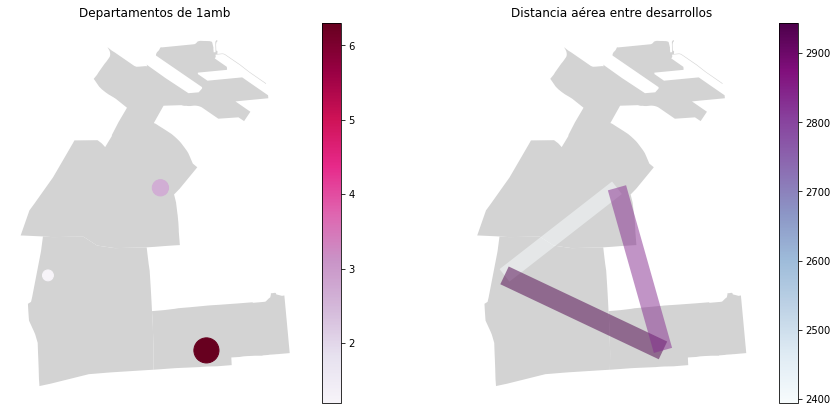

In [248]:
# Figuras y ejes, cambiamos el tamaño para plotear mejor las leyendas
fig = plt.figure(figsize=(15,7))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


# axis 1
barrios_filtro.plot(ax=ax1,
                    color='lightgrey')
ptos_barrio.plot(ax=ax1, 
                 column = '1_amb',
                 legend=True,
                 cmap='PuRd',
                 markersize=ptos_barrio['1_amb']*100)
ax1.set_axis_off()
ax1.set_title('Departamentos de 1amb')


# axis 2
barrios_filtro.plot(ax=ax2,
                   color='lightgrey')
dist_barrio.plot(ax=ax2, 
                 column = 'distancia',
                 legend=True,
                 cmap='BuPu',
                 linewidth = dist_barrio.distancia/150,alpha = 0.5,
                 )
ax2.set_axis_off()
ax2.set_title('Distancia aérea entre desarrollos');